In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [5]:
X_train, X_val, X_test = X_train / 255, X_val / 255, X_test / 255

In [6]:
X_train.shape

(40000, 32, 32, 3)

In [7]:
class_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog','Frog','Horse', 'Ship', 'Truck']

In [8]:
total_classes = len(np.unique(y_train))
total_classes

10

In [9]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [10]:
from keras import regularizers

In [11]:
lamda_l1 = 0.01
reg_l1 = regularizers.l1(lamda_l1)

In [12]:
i = keras.layers.Input(shape=X_train.shape[1:])
x = keras.layers.Conv2D(32, (3,3), padding='same',kernel_regularizer=reg_l1)(i)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D((2,2))(x)

x = keras.layers.Conv2D(64, (3,3), padding='same',kernel_regularizer=reg_l1)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D((2,2))(x)

x = keras.layers.Conv2D(128, (3,3), padding='same',kernel_regularizer=reg_l1)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D((2,2))(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(512, name='HL1', kernel_regularizer=reg_l1)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(256, name='HL2', kernel_regularizer=reg_l1)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(total_classes, activation='softmax')(x)


In [13]:
model = keras.models.Model(inputs=i, outputs=x)

In [14]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL1 (Dense)                     │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL2 (Dense)                     │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,280,202 (4.88 MB)

 Trainable params: 1,278,218 (4.88 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [15]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,monitor='val_loss', restore_best_weights=True)

In [17]:
chk_pt = keras.callbacks.ModelCheckpoint('cifar10_model.keras', save_best_only=True, monitor='val_loss')

In [18]:
callbacks = [early_stopping_cb, chk_pt]

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train, epochs=20,batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.2610 - loss: 51.5361 - val_accuracy: 0.1610 - val_loss: 10.7641
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3576 - loss: 8.3205 - val_accuracy: 0.2414 - val_loss: 7.3352
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3880 - loss: 6.6622 - val_accuracy: 0.3878 - val_loss: 6.5159
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3907 - loss: 6.3340 - val_accuracy: 0.1728 - val_loss: 7.7823
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3947 - loss: 6.2432 - val_accuracy: 0.2566 - val_loss: 6.7559
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4010 - loss: 5.8533 - val_accuracy: 0.2795 - val_loss: 6.3117
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4089 - loss: 5.7247 - val_accuracy: 0.2175 - val_loss: 7.0265
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4082 - loss: 5.5580

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy*100:.4f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3955 - loss: 4.6833
Test loss: 4.6788
Test accuracy: 40.0200%


In [22]:
x_new = X_test[:10]
y_pred = model.predict(x_new)
y_pred = np.argmax(y_pred, axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


array([6, 0, 0, 0, 6, 6, 9, 6, 3, 1])

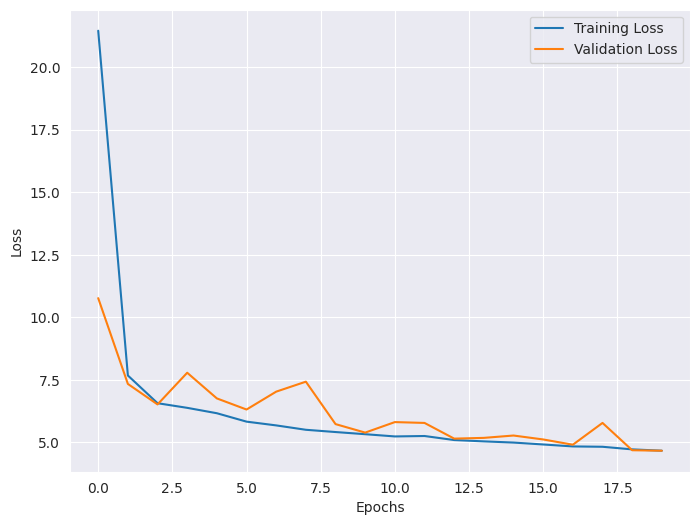

In [23]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

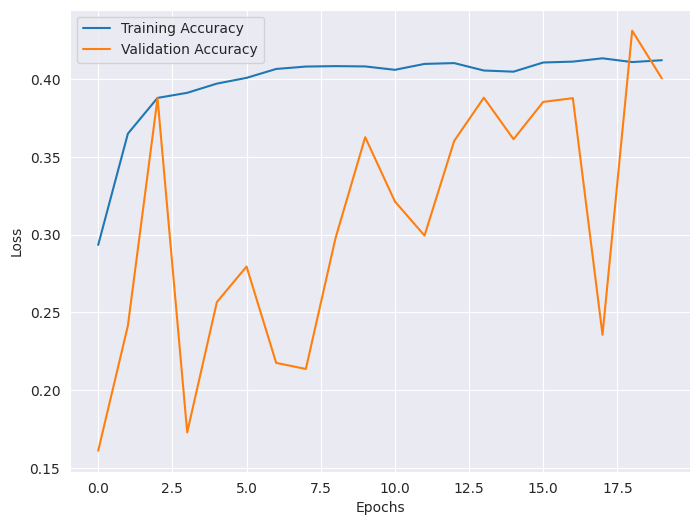

In [24]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()